# Análisis de temperatura y rendimiento
## Alejandro Ruiz Huertas
Mi ordenador personal es un equipo montado por partes de gama media-alta (más media que alta), que uso siempre que puedo (cada vez menos) para mi tiempo de ocio. Es cierta inversión de tiempo y dinero, pretendiendo que funcione bien y que no tenga ningún problema y que funcione correctamente. 

Uno de los problemas recurrentes que ha tenido el ordenador es la temperatura, ya que la caja no tiene un flujo de aire óptimo y tanto la CPU como la GPU suelen tener temperaturas anormalmente altas, sobretodo la GPU. Le compré 3 ventiladores Noctua para mejorar el flujo de aire, y ganó cierta mejoría. Al verano siguiente, gracias a nuestro amigo el capitalismo y el cambio climático, dicha mejora de ventiladores no fue suficiente, alcanzando temperaturas que tampoco debería alcanzar para un uso de cierta intensividad. La GPU está bastante cerca de la PSU y tiene poco espacio de flujo de aire, por lo que es la que más me preocupaba en tema de temperaturas.

En temas de refrigeración de CPU, tenia el disipador Cooler Master Hyper TX3i, por lo que para mejorar la temperatura pensé en comprar una refrigeración líquida y así mejorar la temperatura tanto de la CPU como la de la GPU, además de aprovechar al máximo todos los huecos de aire que ofrece la caja. Tras instalarlo, quería ver si por fin había llegado a las temperaturas correctas, por lo que decidí realizar una monitorización para poder comprobarlo. Para ello, utilicé la herramienta GPU-Z para medir la GPU la CPU y los ventiladores mientras estaban en pleno rendimiento. Para realizar el test, utilicé el banco de pruebas de Read Dead Redemption 2, ya que lo tenía instalado. Una vez obtenidos los datos, los adapté y los convertí a CSV para ver qué conclusiones podemos sacar de ellos, y poder ver si ahora el PC va bien o no. 

## Listado de partes
Refrigeración líquida: 
- Cooler Master MasterLiquid ML240L V2

Fuente de alimentación:
- Corsair TXM Series TX650M

Caja:
- NOX Hummer Zero

Ventiladores:
- 3 Noctua NF-F12 PWM

Tarjeta Gráfica:
- Radeon RX 6600 XT XFX Speedster SWFT 210 

Almacenamiento:
- SSD M.2 WD Blue SN550 500GB 
- SSD M.2 Kingston A2000 1TB  

Placa base:
- Asus TUF GAMING B560M-PLUS WIFI

Procesador:
- Intel Core i5-11600K 3.9 GHz

RAM:
- G.Skill Ripjaws V DDR4 4000MHz 2x8GB


## Carga de datos
A continuación, vamos a cargar las librerías necesarias y cargar los datos del CSV generados por la herramienta. 

In [89]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib 
#Carga de datos
df = pd.read_csv("gpuLog.csv")
df.head()


,Date,GPUClock[MHz],MemoryClock[MHz],GPUTemperature[C],GPUTemperature(HotSpot)[C],FanSpeed(%)[%],FanSpeed(RPM)[RPM],GPULoad[%],MemoryControllerLoad[%],MemoryUsed(Dedicated)[MB],MemoryUsed(Dynamic)[MB],GPUChipPowerDraw[W],GPUVoltage[V],CPUTemperature[C],SystemMemoryUsed[MB]
0,2022-07-15T21:34:43Z,2532.0,1984.0,74.0,95.0,46,1527,94,20,5516,702,129.0,1.150,49.0,11801
1,2022-07-15T21:34:44Z,2469.0,1986.0,74.0,95.0,47,1552,99,20,5516,702,130.0,1.131,51.0,11804
2,2022-07-15T21:34:45Z,2515.0,1986.0,74.0,95.0,47,1561,98,19,5516,703,129.0,1.150,57.0,11835
3,2022-07-15T21:34:46Z,2494.0,1986.0,74.0,96.0,47,1577,99,21,5475,656,130.0,1.137,63.0,11789
4,2022-07-15T21:34:47Z,2477.0,1986.0,75.0,97.0,48,1615,99,18,5516,702,130.0,1.125,60.0,11813


## Estudio de la GPU
Como una de las partes que más me preocupan es la GPU, vamos a ver qué temperaturas máximas tenemos.

In [96]:
maxTempGPUIndex = df['GPUTemperature[C]'].idxmax()
minTempGPUIndex = df['GPUTemperature[C]'].idxmin()

maxTempGPU = df.iloc[maxTempGPUIndex,3]
maxLoadGPU = df.iloc[maxTempGPUIndex,7]

minTempGPU = df.iloc[minTempGPUIndex,3]
minLoadGPU = df.iloc[minTempGPUIndex,7]

print(f'La temperatura máxima ha sido {maxTempGPU}°C al {maxLoadGPU}%')
print(f'La temperatura mínima ha sido {minTempGPU}°C al {minLoadGPU}%')

La temperatura máxima ha sido 82.0°C al 98%
La temperatura mínima ha sido 57.0°C al 1%


Las temperaturas máximas y mínimas han sido 82 grados y 57 grados a una carga del 98% y 1% (máxima carga y mínima carga), lo cual entran dentro de los parámetros aceptables. Tampoco hay que cantar victoria, ya que al estar el PC limpio eso ayuda a que proporcione buenos resultados. Aún así, no hay por qué ser tremendistas, ya que de momento esto son buenas noticias. Vamos a ver la evolución de temperatura y carga durante la prueba.

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_3840\1212515800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graficaGPU["Date"] = pd.to_datetime(graficaGPU["Date"])


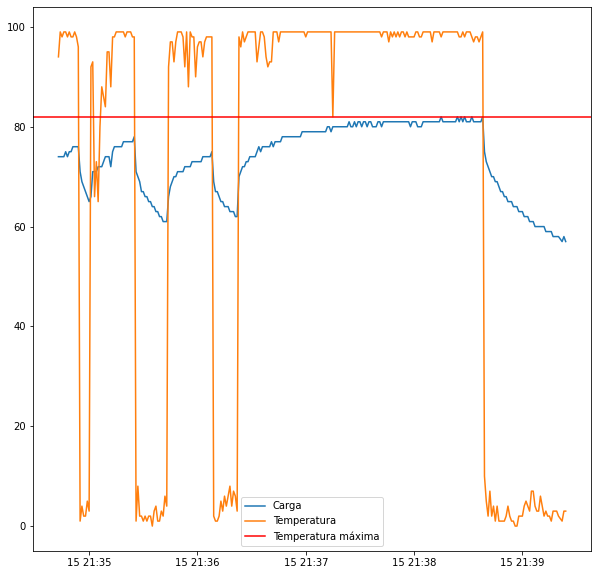

In [97]:
graficaGPU = df.iloc[:,[0,3,7]]
graficaGPU["Date"] = pd.to_datetime(graficaGPU["Date"]) 
dates = graficaGPU["Date"]

tempGPU = df.iloc[:,3]
loadGPU = df.iloc[:,7]

plt.plot(dates,tempGPU)
plt.plot(dates,loadGPU)

plt.axhline(y=maxTempGPU, color= 'r')
plt.legend(['Carga','Temperatura', 'Temperatura máxima'])

plt.show()

Se puede apreciar que en los momentos de más intensidad la temperatura aumenta de forma logarítmica, por lo que tiende a estabilizarse a cierta temperatura, que no llega a ser los 82°C que hemos calculado antes, sino un poquito menos, lo cual son buenas noticias. En momentos de descarga de intensidad, vemos que la temperatura baja a unos 60°C, lo cual es una buena temperatura también. En conclusión, la GPU alcanza buenas temperaturas, y aunque se puedan realizar ciertas mejoras como pueden ser el cambio de caja para mejorar la entrada de aire, las temperaturas que obtenemos son excelentes. De todas maneras, las mejoras que hemos realizado mejoran directamente las temperaturas de la CPU, y hay aspectos como el airflow de la caja que sí afectan directamente a la GPU pero que no hemos realizado.

## Estudio de la CPU
Como el cambio de refrigeración afecta directamente a la CPU (aunque nosotros lo hayamos aprovechado para disminuir la temperatura general del ordenador), vamos a ver realmente cómo afecta a nuestra CPU esta mejora de disipación. Como referencia, la temperatura de la CPU era similar a la de la GPU, por lo que podemos utilizar esto para comparar.

In [94]:
maxTempCPUIndex = df['CPUTemperature[C]'].idxmax()
minTempCPUIndex = df['CPUTemperature[C]'].idxmin()

maxTempCPU = df.iloc[maxTempCPUIndex,-2]


minTempCPU = df.iloc[minTempCPUIndex,-2]

print(f'La temperatura máxima ha sido {maxTempCPU}°C')
print(f'La temperatura mínima ha sido {minTempCPU}°C')

La temperatura máxima ha sido 75.0°C
La temperatura mínima ha sido 47.0°C


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_3840\4077073995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graficaCPU["Date"] = pd.to_datetime(graficaCPU["Date"])


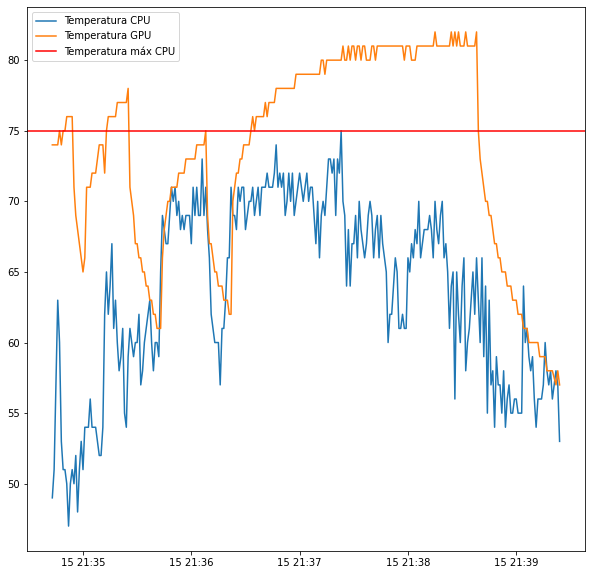

In [99]:
graficaCPU = df.iloc[:,[0,13]]
graficaCPU["Date"] = pd.to_datetime(graficaCPU["Date"]) 
dates = graficaCPU["Date"]

tempCPU = df.iloc[:,13]
plt.plot(dates,tempCPU)
plt.plot(dates,tempGPU)

plt.axhline(y=maxTempCPU, color= 'r')
plt.legend(['Temperatura CPU', 'Temperatura GPU', 'Temperatura máx CPU'])

plt.show()

Esta gráfica sólo hay que tomar como referencia las temperaturas de CPU y GPU. Como podemos ver, la temperatura de la CPU es drásticamente menor que la temperatura de la GPU, además que va realizando subidas y bajadas más llamativas. Vemos que ha mejorado bastante la temperatura de la CPU, viendo así que a este componente le ha venido de perlas esta nueva refrigeración, estando unos 15°C por debajo de su temperatura pico que su anterior refrigeración. 